In [1]:
import numpy as np
import matplotlib.pyplot as plt

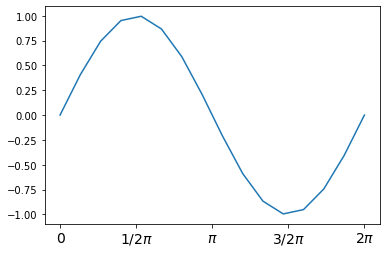

In [25]:
x = np.linspace(0, 2*np.pi, 16)
y = np.sin(x)
plt.plot(x, y)
plt.xticks(np.linspace(0, 2*np.pi, 5),
           ['0', '1/2$\pi$', u'$\pi$', '3/2$\pi$', u'2$\pi$'],
           fontsize=14)
plt.show()

# FFT（お試し）

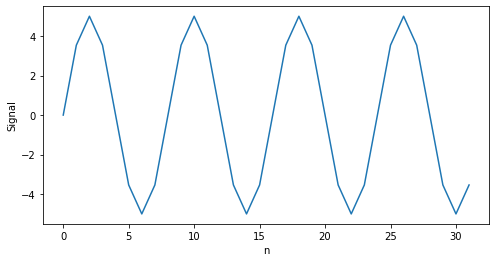

In [50]:
N = 32
n = np.arange(N)
freq = 4
amp = 5
signal = amp * np.sin(freq * 2*np.pi * n/N)

plt.figure(figsize=(8, 4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(signal)

In [51]:
ffted = np.fft.fft(signal)
print(type(ffted), ffted.dtype)
print(ffted.shape)
print(ffted)

<class 'numpy.ndarray'> complex128
(32,)
[-2.87977692e-15+0.00000000e+00j -1.13578234e-15+1.41133580e-15j
 -1.57108429e-15+2.87165619e-15j -6.06786863e-15+1.62918740e-14j
 -3.84613373e-14-8.00000000e+01j  9.36663034e-15-7.18297858e-15j
  7.51350031e-15-8.39238628e-15j  6.52472208e-16-5.89601725e-15j
  2.44929360e-15-1.77635684e-15j  4.24611499e-15-3.86695600e-15j
 -2.61491311e-15-3.49379908e-15j -4.46804315e-15+4.64325706e-15j
  4.17122688e-15-2.84217094e-14j  1.09664558e-14+4.46563840e-15j
  6.46967149e-15-2.02693101e-15j  6.03436953e-15-6.17725453e-16j
  7.77836412e-15+0.00000000e+00j  6.03436953e-15+6.17725453e-16j
  6.46967149e-15+2.02693101e-15j  1.09664558e-14-4.46563840e-15j
  4.17122688e-15+2.84217094e-14j -4.46804315e-15-4.64325706e-15j
 -2.61491311e-15+3.49379908e-15j  4.24611499e-15+3.86695600e-15j
  2.44929360e-15+1.77635684e-15j  6.52472208e-16+5.89601725e-15j
  7.51350031e-15+8.39238628e-15j  9.36663034e-15+7.18297858e-15j
 -3.84613373e-14+8.00000000e+01j -6.06786863e-15-

In [52]:
ffted_abs = np.abs(ffted)
print(ffted_abs.shape)
print(ffted_abs)

(32,)
[2.87977692e-15 1.81159329e-15 3.27333395e-15 1.73851715e-14
 8.00000000e+01 1.18037683e-14 1.12643169e-14 5.93200973e-15
 3.02563758e-15 5.74306897e-15 4.36398930e-15 6.44385333e-15
 2.87261675e-14 1.18408226e-14 6.77975652e-15 6.06590475e-15
 7.77836412e-15 6.06590475e-15 6.77975652e-15 1.18408226e-14
 2.87261675e-14 6.44385333e-15 4.36398930e-15 5.74306897e-15
 3.02563758e-15 5.93200973e-15 1.12643169e-14 1.18037683e-14
 8.00000000e+01 1.73851715e-14 3.27333395e-15 1.81159329e-15]


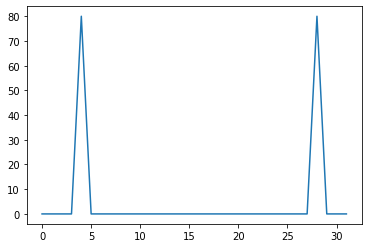

In [53]:
plt.plot(ffted_abs)

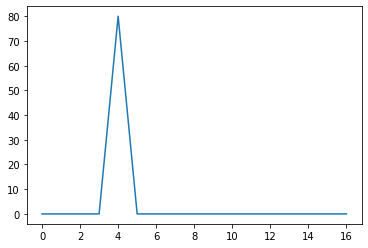

In [54]:
plt.plot(ffted_abs[:int(N/2)+1])

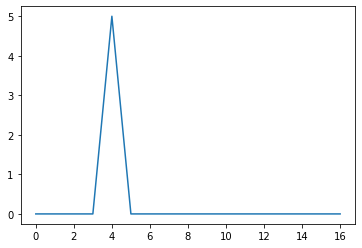

In [55]:
ffted_abs_amp = ffted_abs/N * 2
ffted_abs_amp[0] = ffted_abs_amp[0] / 2
plt.plot(ffted_abs_amp[:int(N/2)+1])

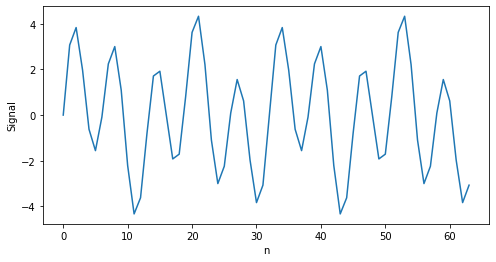

In [59]:
N = 64
n = np.arange(N)
f1 = 4
f2 = 10
a1 = 1.5
a2 = 3
f = a1 * np.sin(f1 * 2*np.pi * n/N) + a2 * np.sin(f2 * 2*np.pi * n/N)

plt.figure(figsize=(8, 4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(f)

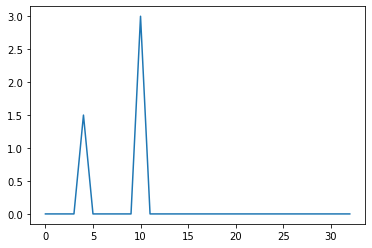

In [60]:
F = np.fft.fft(f)
F_abs = np.abs(F)
F_abs_amp = F_abs/N *2
F_abs_amp[0] = F_abs_amp[0] * 2

plt.plot(F_abs_amp[:int(N/2)+1])

# FFT

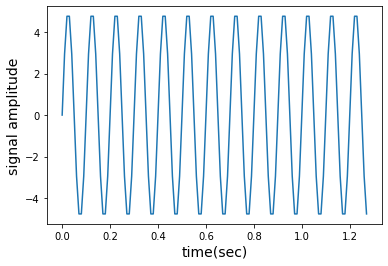

In [76]:
sampling_rate = 128
sampling_cycle = 0.01 #0.01[s]=100[ms] => サンプリング周波数:100Hz
frequency = 10 #周波数(Hz) => 正弦波の周期:0.1[s]
amplitude = 1

time = np.arange(0, sampling_rate*sampling_cycle, sampling_cycle)
signal = amp * np.sin(2*np.pi * frequency * time)

plt.xlabel('time(sec)', fontsize=14)
plt.ylabel('signal amplitude', fontsize=14)
plt.plot(time, signal)

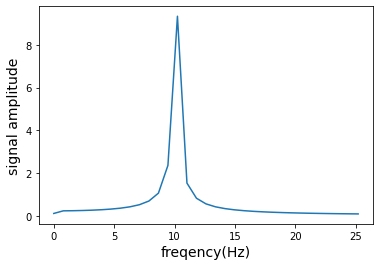

In [81]:
F = np.fft.fft(signal)
# FFTの複素数結果を絶対に変換
F_abs = np.abs(F)
# 振幅をもとの信号に揃える
F_abs_amp = F_abs / N * 2 # 交流成分はデータ数で割って2倍する
F_abs_amp[0] = F_abs_amp[0] / 2 # 直流成分は2倍不要

# plt.plot(F_abs_amp) # ->NG、周波数軸に変更する必要あり
fq = np.linspace(0, 1.0/sampling_cycle, sampling_rate)
plt.xlabel('freqency(Hz)', fontsize=14)
plt.ylabel('signal amplitude', fontsize=14)
plt.plot(fq[:int(N/2)+1], F_abs_amp[:int(N/2)+1]) # ナイキスト定数まで表示

In [93]:
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(a.shape)
print(a.reshape(5, 2))
print(a.reshape(5, 2).T)

(10,)
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[0 2 4 6 8]
 [1 3 5 7 9]]
